# Bharat Inter - Data Science Intern

# Task 2 - Titanic Classification

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


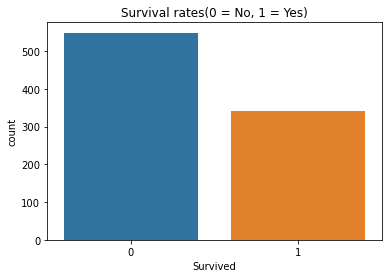

In [20]:
sns.countplot(x='Survived',data=titanic)
plt.title('Survival rates(0 = No, 1 = Yes)')
plt.show()

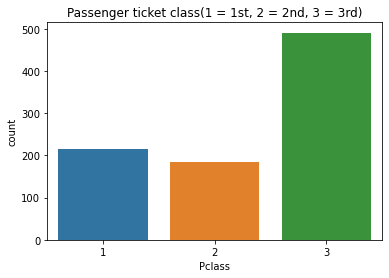

In [22]:
sns.countplot(x='Pclass',data=titanic)
plt.title('Passenger ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()

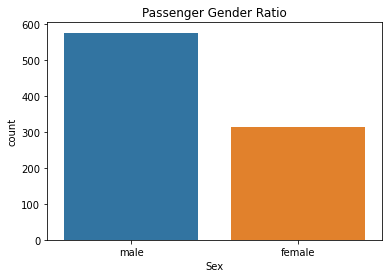

In [23]:
sns.countplot(x='Sex',data=titanic)
plt.title('Passenger Gender Ratio')
plt.show()

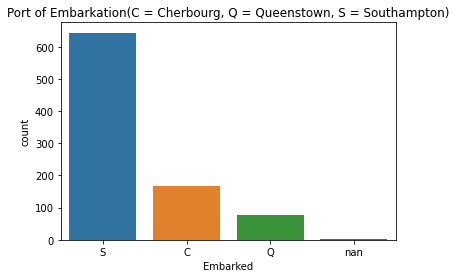

In [25]:
titanic=titanic.astype({'Embarked':str})
sns.countplot(x='Embarked',data=titanic)
plt.title('Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()

In [26]:
df=titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
clean={
    'Sex':{'male':0,'female':1}
    }
df=df.replace(clean)
df=df.fillna({'Age':df['Age'].mean()})
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [27]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
Xtrain.shape

(712, 6)

In [28]:
Xtest.shape


(179, 6)

In [29]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(Xtrain,ytrain)
ytpred=m.predict(Xtrain)
ypred=m.predict(Xtest)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

trac=accuracy_score(ytrain,ytpred)
tsac=accuracy_score(ytest,ypred)
print("Training Accuracy:",trac)
print("Testing Accuracy:",tsac)

Training Accuracy: 0.9817415730337079
Testing Accuracy: 0.8324022346368715


In [30]:
cr=classification_report(ytest,ypred)
print("Testing classification report:\n",cr)

Testing classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



[[101   9]
 [ 21  48]]


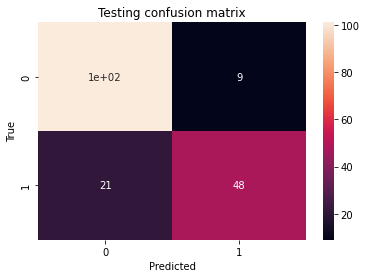

In [31]:
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(data=cm,annot=True)
plt.title('Testing confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()